# Decision tree predicting the numerical column of body_mass_g in Penguins dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [5]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
penguins_model = penguins.dropna()

In [7]:
penguins_train, penguins_test = train_test_split(penguins_model, test_size=0.3, stratify=penguins_model['species'], random_state=42)

In [8]:
features= ['bill_length_mm','flipper_length_mm']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(penguins_train[features], penguins_train['body_mass_g'])

DecisionTreeRegressor(max_depth=3)

In [9]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [10]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 348.37874508841065
RMSE on test set 403.8548465547442


The difference between the training set and the test set is approximately 50 grams. That is not a lot imo, since that means the model isn't to overfitted. Also, a RMSE of 400 grams where most penguins are approximately 3.5 to 5.5 kilos sounds about right as well.

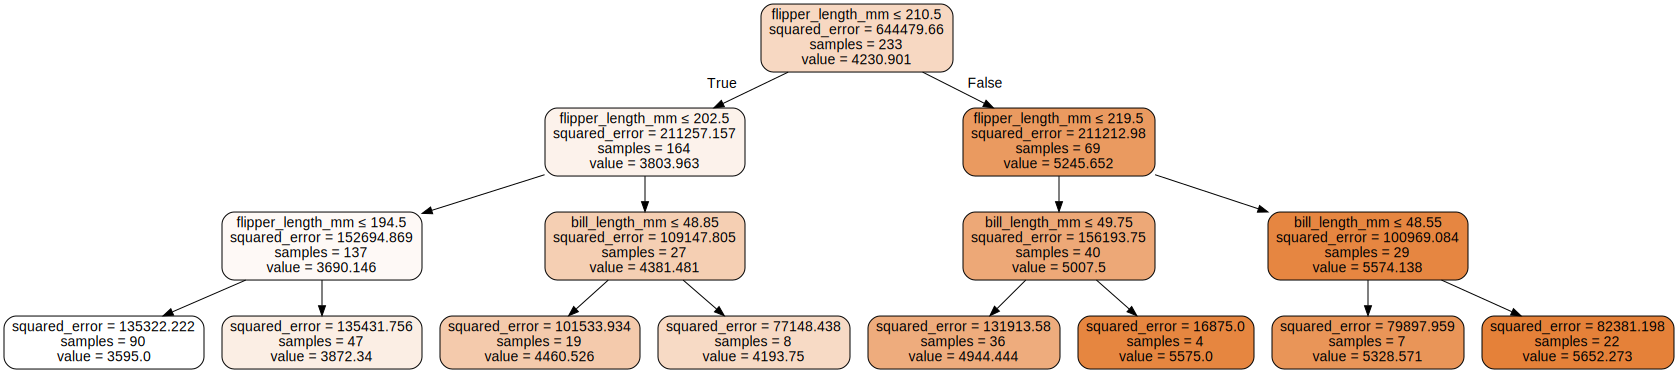

In [11]:
plot_tree_regression(dt_regression, features)

The tree shows that the larger the flipper is, the heavier the penguin. Makes sense